# Bezier for litter pick up

In [2]:
import numpy as np

In [3]:
import scipy

In [4]:
import matplotlib.pyplot as plt

def plot_points(points):
    # Create a new figure and axes
    fig, ax = plt.subplots()

    # Plot each point from the dictionary
    for name, position in points.items():
        ax.plot(position[0], position[1], 'o', markersize=10, label=name)

    # Add grid lines
    ax.grid(True)

    # Add legend
    ax.legend()

    # Set x and y axis labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    # Set title
    ax.set_title('Points')

    # Show the plot
    #plt.show()
    
    return fig, ax
    

def plot_curve(points, fig=None, ax=None):
    # If figure and axes are not provided, create new ones
    if fig is None or ax is None:
        fig, ax = plt.subplots()
        # Add grid lines
        ax.grid(True)
        # Set x and y axis labels
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        # Set title
        ax.set_title('Curve')
        ax.set_xlim(0, 10)
        ax.set_ylim(0, 10)
        
    x_coords = points[:, 0]
    y_coords = points[:, 1]
    
    # Extract x and y coordinates from the points array
    if points.shape[-1] == 3: 
        z_coords = points[:, 2]
        ax.plot(x_coords, y_coords, z_coords, 'o')
        ax.set_zlabel('Z')
    else: 
        ax.plot(x_coords, y_coords, 'o-', markersize=5)

    # Show the plot
    plt.show()
    
    return fig, ax
    
    
def plot_points_3d(points={}, graph_limits={"x":[0, 10], "y":[0, 10], "z":[0, 5]}):
    # Create a new figure and subplot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Set the graph limits
    ax.set_xlim((graph_limits["x"][0], graph_limits["x"][1]))
    ax.set_ylim((graph_limits["y"][0], graph_limits["y"][1]))
    ax.set_zlim((graph_limits["z"][0], graph_limits["z"][1]))

    # Extract x, y, and z coordinates from the points dictionary
    x = [point[0] for point in points.values()]
    y = [point[1] for point in points.values()]
    z = [point[2] for point in points.values()]

    # Plot the points in 3D
    ax.scatter(x, y, z, c='r', marker='o')

    # Set labels for the axes
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    # Show the plot
    #plt.show()
    
    return fig, ax

# Bezier curves

<img src="bezier_eq.png">

<img src="bezier_quad_eq.png">

In [5]:
def create_linear_bezier_curve(p0, p1, p2, start_t=0, end_t=1, dt=0.01): 
    
    p0 = np.array(p0); p1 = np.array(p1); p2 = np.array(p2)
    
    #print(p0, p1, p2)
    
    # Create p in dimension 1, X
    p0 = p0.reshape(1, p0.shape[0])
    p1 = p1.reshape(1, p1.shape[0])
    p2 = p2.reshape(1, p2.shape[0])
    
    # Create t in dimension X, 1
    N = int((end_t - start_t) / dt)
    t = np.linspace(start_t, end_t, N).reshape(N, 1)
    
    # Bezier curve
    B = (1 - t)*((1 - t) * p0 + t*p1) + t*[(1 - t) * p1 + t*p2]
    
    return B.squeeze()

def create_quadratic_bezier_curve(p0, p1, p2, start_t=0, end_t=1, dt=0.01):
    
    p0 = np.array(p0); p1 = np.array(p1); p2 = np.array(p2)
    
    #print(p0, p1, p2)
    
    # Create p in dimension 1, X
    p0 = p0.reshape(1, p0.shape[0])
    p1 = p1.reshape(1, p1.shape[0])
    p2 = p2.reshape(1, p2.shape[0])
    
    # Create t in dimension X, 1
    N = int((end_t - start_t) / dt)
    t = np.linspace(start_t, end_t, N).reshape(N, 1)
    
    # Bezier quadratic curve
    Bquad = ((1-t)**2)*p0 + 2*(1-t)*t*p1 + t**2*p2
    
    return Bquad.squeeze()
    
    # Quadratic Bezier Curve
    

# 1st Scenario

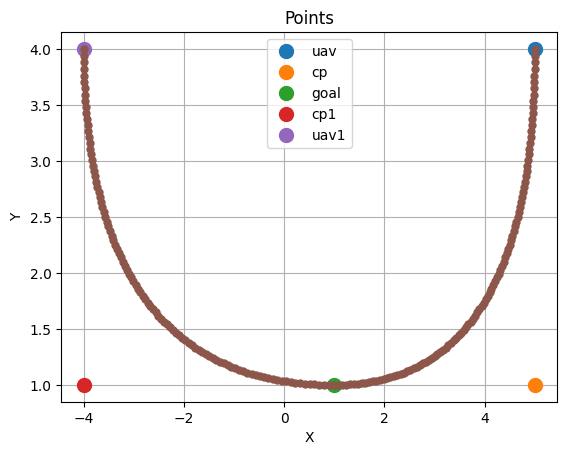

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Points'}, xlabel='X', ylabel='Y'>)

In [25]:
pts_ = {"uav": (5, 4), 
        "cp": (5, 1), 
       "goal": (1, 1),
        "cp1": (-4, 1), 
        "uav1": (-4, 4)}

fig0, ax0 = plot_points(pts_)
Bquad1 = create_quadratic_bezier_curve( pts_["uav"], pts_["cp"], pts_["goal"])
Bquad2 = create_quadratic_bezier_curve( pts_["goal"], pts_["cp1"], pts_["uav1"])

Bquad_complete = np.vstack((Bquad1, Bquad2))
plot_curve(Bquad_complete, fig0, ax0)
#plot_curve(Bquad2, fig0, ax0)




# 2nd scenario 3D 

dict_values([(9, 8, 3), (9, 8, 1), (3, 8, 1)])


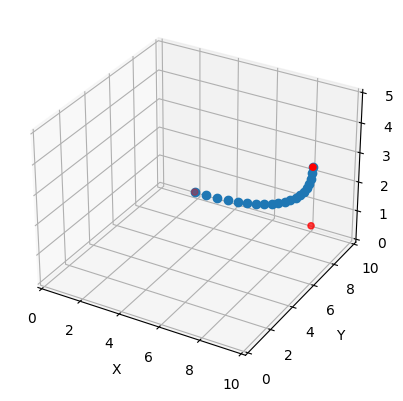

In [74]:
pts_ = {"uav": (9, 8, 3), 
        "cp": (9, 8, 1), 
       "goal": (3, 8, 1)}

print(pts_.values())

fig0, ax0 = plot_points_3d(pts_)
Bquad = create_quadratic_bezier_curve( pts_["uav"], pts_["cp"], pts_["goal"], dt=0.05)
fig0, ax0 = plot_curve(Bquad, fig0, ax0)

    

dict_values([(9, 8, 3), (9, 8, 1), (3, 8, 1), (-3, 8, 1), (-3, 8, 3)])


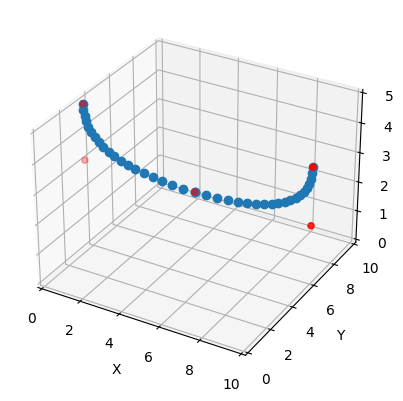

In [27]:
pts_ = {"uav": (9, 8, 3), 
        "cp": (9, 8, 1), 
       "goal": (3, 8, 1), 
       "cp1": (-3, 8, 1), 
       "uav1": (-3, 8, 3)}

print(pts_.values())

fig0, ax0 = plot_points_3d(pts_)
Bquad1 = create_quadratic_bezier_curve( pts_["uav"], pts_["cp"], pts_["goal"], dt=0.05)
Bquad2 = create_quadratic_bezier_curve( pts_["goal"], pts_["cp1"], pts_["uav1"], dt=0.05)

Bcomplete = np.vstack((Bquad1, Bquad2))
fig0, ax0 = plot_curve(Bcomplete, fig0, ax0)


In [8]:
pts_ = {"uav": (9, 8, 3), 
        "cp": (9, 8, 1), 
       "goal": (3, 8, 1), 
       "cp1": (-3, 8, 1), 
       "uav1": (-3, 8, 3)}


x_dist = 5
y_dist = 5

def create_pts(start_point, goal_point, x_dist, y_dist, cp_h):
    
    cp1 = (start_point[0], start_point[1], start_point[2] - cp_h) 
    cp2 = (start_point[0] + x_dist, start_point[1] + y_dist, start_point[2] - cp_h)
    end_point = (start_point[0] + x_dist, start_point[1] + y_dist, start_point[2])
    
    pts = {"start": start_point, 
          "goal": goal_point, 
          "cp1": cp1, 
          "cp2": cp2, 
          "end": end_point}
    return pts 

pts = 
    
    

[(9, 8, 3), (9, 8, 1), (3, 8, 1)]


## Two questions arise: 

- How to plan for the net (ARUCO marker, kinematic chain, it is an end effector for which we are planning) 
- Why bezier (nice position profile)--> use that bezier as a input to the MPC tracker?

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Polygons 

In [52]:
import random

def generate_random_polygon(num_vertices, width, height):
    if num_vertices < 3:
        raise ValueError("A polygon must have at least 3 vertices.")

    x_coords = [random.uniform(0, width) for _ in range(num_vertices)]
    y_coords = [random.uniform(0, height) for _ in range(num_vertices)]

    # Sort the x and y coordinates based on the x values only
    sorted_indices = sorted(range(num_vertices), key=lambda i: x_coords[i])
    x_coords = [x_coords[i] for i in sorted_indices]
    y_coords = [y_coords[i] for i in sorted_indices]

    # Create the polygon using the sorted x and y coordinates
    polygon = [(x, y) for x, y in zip(x_coords, y_coords)]

    return polygon

from scipy.spatial import ConvexHull

def generate_concave_polygon(num_vertices, width, height):
    if num_vertices < 3:
        raise ValueError("A polygon must have at least 3 vertices.")

    # Generate random x and y coordinates within the specified range
    x_coords = [random.uniform(0, width) for _ in range(num_vertices)]
    y_coords = [random.uniform(0, height) for _ in range(num_vertices)]

    # Create a set of points by combining x and y coordinates
    points = list(zip(x_coords, y_coords))

    # Compute the convex hull of the points
    hull = ConvexHull(points)
    convex_hull_vertices = [points[i] for i in hull.vertices]

    # Introduce new points within the convex hull to create concave angles
    concave_polygon = convex_hull_vertices.copy()

    for _ in range(num_vertices - len(convex_hull_vertices)):
        random_vertex = random.choice(convex_hull_vertices)
        new_vertex = (
            random.uniform(random_vertex[0] - 0.5, random_vertex[0] + 0.5),
            random.uniform(random_vertex[1] - 0.5, random_vertex[1] + 0.5),
        )
        concave_polygon.append(new_vertex)

    return concave_polygon

def generate_convex_polygon(num_vertices, width, height):
    if num_vertices < 3:
        raise ValueError("A polygon must have at least 3 vertices.")

    # Generate random x and y coordinates within the specified range
    x_coords = [random.uniform(0, width) for _ in range(num_vertices)]
    y_coords = [random.uniform(0, height) for _ in range(num_vertices)]

    # Create a set of points by combining x and y coordinates
    points = list(zip(x_coords, y_coords))

    # Compute the convex hull of the points
    hull = ConvexHull(points)
    convex_polygon = [points[i] for i in hull.vertices]

    return convex_polygon

In [53]:
# Example usage:
num_vertices = 5
random_polygon = generate_random_polygon(num_vertices, 1280, 768)
print(random_polygon)


[(473.5120286625167, 527.5897043803516), (550.9888431202896, 561.8107590366077), (553.6011640713406, 89.01172973439711), (743.2735550231585, 279.23190139574916), (891.8851748026741, 127.19445878498038)]


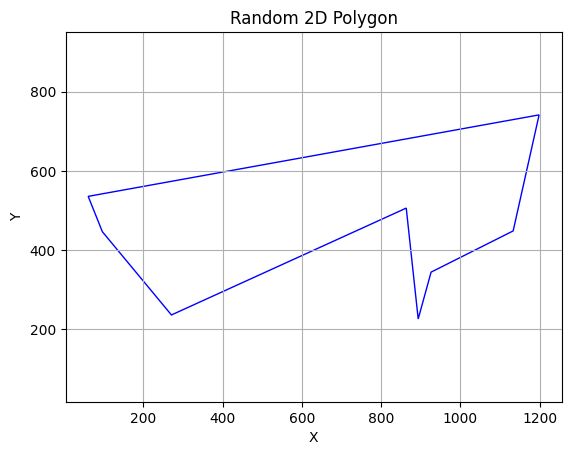

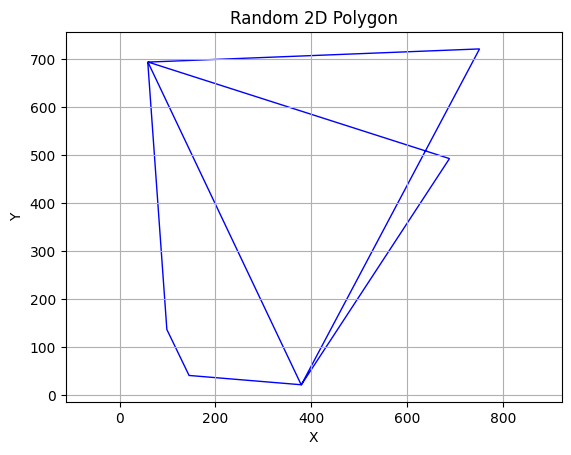

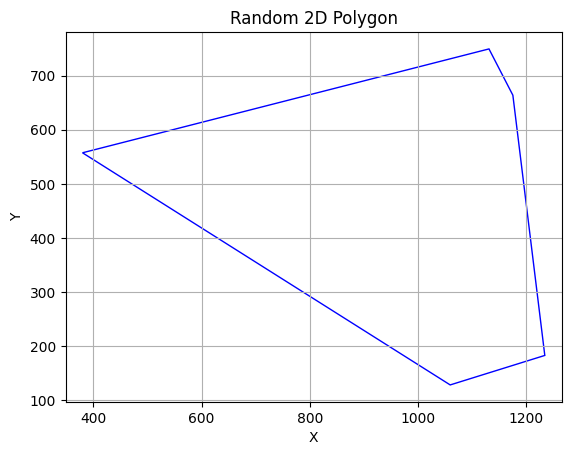

In [54]:
import matplotlib.patches as patches

def plot_polygon(polygon):
    # Extract x and y coordinates from the polygon
    x_coords, y_coords = zip(*polygon)

    # Close the polygon by repeating the first vertex at the end
    x_coords += (x_coords[0],)
    y_coords += (y_coords[0],)

    # Plot the polygon using matplotlib patch
    fig, ax = plt.subplots()
    polygon_patch = patches.Polygon(xy=list(zip(x_coords, y_coords)), edgecolor='b', facecolor='none')
    ax.add_patch(polygon_patch)

    # Set axis limits and labels
    plt.xlim(min(x_coords) - 1, max(x_coords) + 1)
    plt.ylim(min(y_coords) - 1, max(y_coords) + 1)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Random 2D Polygon')
    plt.grid(True)
    plt.axis('equal')
    plt.show()


# Example usage:
num_vertices = 8
random_polygon = generate_random_polygon(num_vertices, 1280, 768)
concave_polygon = generate_concave_polygon(num_vertices, 1280, 768)
convex_polygon = generate_convex_polygon(num_vertices, 1280, 768)
plot_polygon(random_polygon)
plot_polygon(concave_polygon)
plot_polygon(convex_polygon)

In [55]:
def calculate_diagonals(polygon):
    num_vertices = len(polygon)
    diagonals = []

    for i in range(num_vertices):
        for j in range(i + 2, num_vertices + i - 1):
            j %= num_vertices
            if j != i and j != (i + 1) % num_vertices:
                diagonals.append((polygon[i], polygon[j]))

    return diagonals

def plot_polygon_with_diagonals(polygon, diagonals):
    # Extract x and y coordinates from the polygon
    x_coords, y_coords = zip(*polygon)

    # Close the polygon by repeating the first vertex at the end
    x_coords += (x_coords[0],)
    y_coords += (y_coords[0],)

    # Plot the polygon using matplotlib patch
    fig, ax = plt.subplots()
    polygon_patch = patches.Polygon(xy=list(zip(x_coords, y_coords)), edgecolor='b', facecolor='none')
    ax.add_patch(polygon_patch)

    # Plot the diagonals
    for diagonal in diagonals:
        x_coords, y_coords = zip(*diagonal)
        plt.plot(x_coords, y_coords, 'r--')

    # Set axis limits and labels
    plt.xlim(min(x_coords) - 1, max(x_coords) + 1)
    plt.ylim(min(y_coords) - 1, max(y_coords) + 1)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Polygon with Diagonals')
    plt.grid(True)
    plt.axis('equal')
    plt.show()

# Example usage:
num_vertices = 3
width = 10
height = 10
random_polygon = generate_convex_polygon(num_vertices, width, height)
print("Polygon vertices:", random_polygon)

diagonals = calculate_diagonals(random_polygon)
print("Diagonals:", diagonals)

Polygon vertices: [(2.18240365614096, 2.028502423568743), (7.449919539614235, 2.466351601714715), (6.672186226078601, 7.284086116815338)]
Diagonals: []


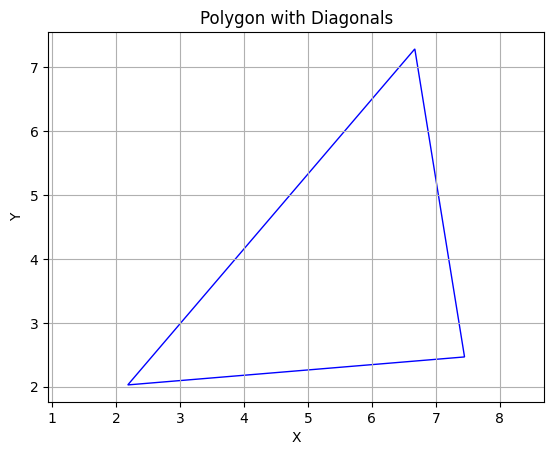

In [56]:
plot_polygon_with_diagonals(random_polygon, diagonals)

In [65]:
from shapely.geometry import LineString

def find_intersections(diagonals):
    intersections = []

    # Check all possible pairs of diagonals for intersections
    for i in range(len(diagonals)):
        for j in range(i + 1, len(diagonals)):
            line1 = LineString(diagonals[i])
            line2 = LineString(diagonals[j])

            # Check if the two lines intersect
            if line1.intersects(line2):
                intersection_point = line1.intersection(line2)
                if intersection_point.geom_type == 'Point':
                    intersection = intersection_point.x, intersection_point.y
                    if intersection not in intersections:
                        intersections.append(intersection)

    return intersections

# Example usage:
num_vertices = 5
width = 10
height = 10
random_polygon = generate_convex_polygon(num_vertices, width, height)
print("Polygon vertices:", random_polygon)

diagonals = calculate_diagonals(random_polygon)
print("Diagonals:", diagonals)

intersections = find_intersections(diagonals)
print("Intersections:", intersections)


Polygon vertices: [(9.237559438984153, 5.40844499801204), (1.1465395524448652, 4.2182633489498595), (3.6133767334873843, 2.25652407209238), (8.06115882284973, 0.5368215788187036)]
Diagonals: [((9.237559438984153, 5.40844499801204), (3.6133767334873843, 2.25652407209238)), ((1.1465395524448652, 4.2182633489498595), (8.06115882284973, 0.5368215788187036)), ((3.6133767334873843, 2.25652407209238), (9.237559438984153, 5.40844499801204)), ((8.06115882284973, 0.5368215788187036), (1.1465395524448652, 4.2182633489498595))]
Intersections: [(4.206658195255592, 2.5890126046003665)]


In [66]:
def plot_polygon_with_diagonals_and_intersections(polygon, diagonals, intersections):
    # Extract x and y coordinates from the polygon
    x_coords, y_coords = zip(*polygon)

    # Close the polygon by repeating the first vertex at the end
    x_coords += (x_coords[0],)
    y_coords += (y_coords[0],)

    # Plot the polygon using matplotlib patch
    fig, ax = plt.subplots()
    polygon_patch = patches.Polygon(xy=list(zip(x_coords, y_coords)), edgecolor='b', facecolor='none')
    ax.add_patch(polygon_patch)

    # Plot the diagonals
    for diagonal in diagonals:
        x_coords, y_coords = zip(*diagonal)
        plt.plot(x_coords, y_coords, 'r--')

    # Plot the intersection points
    x_intersections, y_intersections = zip(*intersections)
    plt.plot(x_intersections, y_intersections, 'go', markersize=8)

    # Set axis limits and labels
    plt.xlim(min(x_coords) - 1, max(x_coords) + 1)
    plt.ylim(min(y_coords) - 1, max(y_coords) + 1)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Polygon with Diagonals and Intersections')
    plt.grid(True)
    plt.axis('equal')
    plt.show()


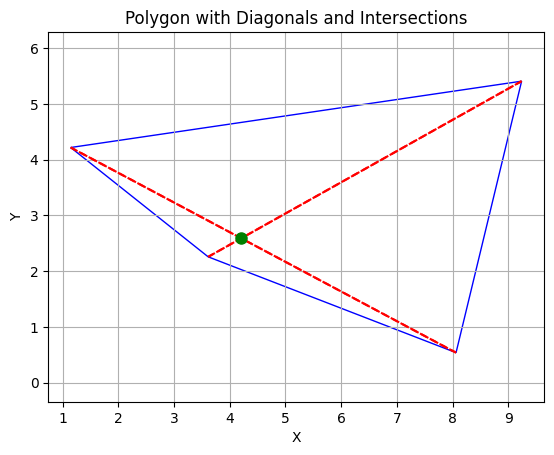

In [67]:
plot_polygon_with_diagonals_and_intersections(random_polygon, diagonals, intersections)

In [68]:
def sample_points_from_edges(polygon, num_points):
    num_vertices = len(polygon)
    sampled_points = []

    for i in range(num_vertices):
        x1, y1 = polygon[i]
        x2, y2 = polygon[(i + 1) % num_vertices]
        dx = (x2 - x1) / (num_points + 1)
        dy = (y2 - y1) / (num_points + 1)

        for j in range(num_points):
            sampled_points.append((x1 + (j + 1) * dx, y1 + (j + 1) * dy))

    return sampled_points

https://en.wikipedia.org/wiki/Centroid

http://www.java2s.com/example/java/2d-graphics/function-to-calculate-the-center-of-mass-for-a-given-polygon.html

In [69]:
points = sample_points_from_edges(random_polygon, 100)

In [70]:
def plot_polygon_with_sampled_points_and_centroid(polygon, sampled_points, centroid):
    # Extract x and y coordinates from the polygon
    x_coords, y_coords = zip(*polygon)

    # Close the polygon by repeating the first vertex at the end
    x_coords += (x_coords[0],)
    y_coords += (y_coords[0],)

    # Plot the polygon using matplotlib patch
    fig, ax = plt.subplots()
    polygon_patch = patches.Polygon(xy=list(zip(x_coords, y_coords)), edgecolor='b', facecolor='none')
    ax.add_patch(polygon_patch)

    # Plot the sampled points
    sampled_x_coords, sampled_y_coords = zip(*sampled_points)
    plt.plot(sampled_x_coords, sampled_y_coords, 'ro')

    # Plot the centroid
    plt.plot(centroid[0], centroid[1], 'go')

    # Set axis limits and labels
    plt.xlim(min(x_coords) - 1, max(x_coords) + 1)
    plt.ylim(min(y_coords) - 1, max(y_coords) + 1)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Polygon with Sampled Points and Centroid')
    plt.grid(True)
    plt.axis('equal')
    plt.show()
    
def calculate_centroid(polygon):
    num_vertices = len(polygon)
    centroid_x = sum(x for x, y in polygon) / num_vertices
    centroid_y = sum(y for x, y in polygon) / num_vertices
    return (centroid_x, centroid_y)

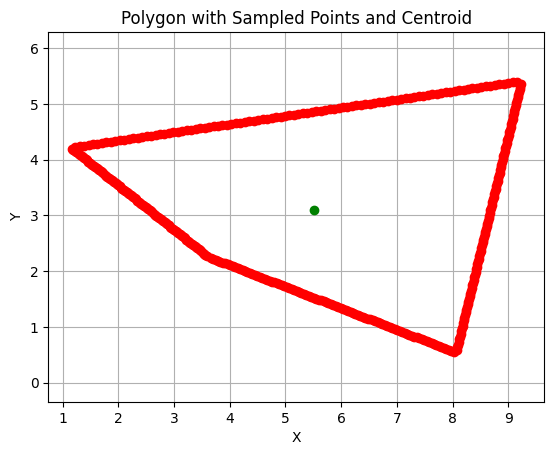

In [71]:
vertex_centroid = calculate_centroid(random_polygon) 
plot_polygon_with_sampled_points_and_centroid(random_polygon, points, vertex_centroid)

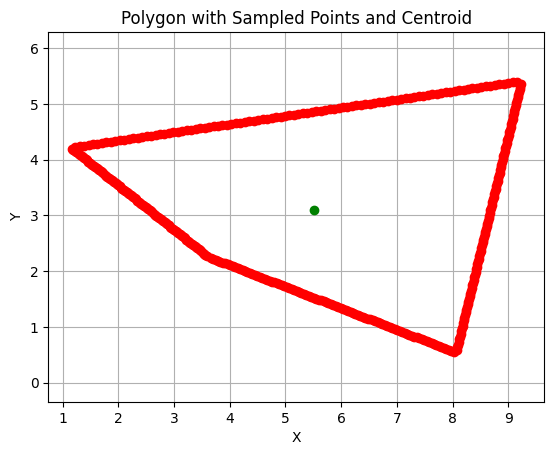

In [72]:
sampled_centroid = calculate_centroid(points)
plot_polygon_with_sampled_points_and_centroid(random_polygon, points, sampled_centroid)

In [4]:
t = np.linspace(0, 1, 5)

In [5]:
print(t)

[0.   0.25 0.5  0.75 1.  ]


In [11]:
print((1-t)**2)

print((1-t)*t)

print(t**2)

[1.     0.5625 0.25   0.0625 0.    ]
[0.     0.1875 0.25   0.1875 0.    ]
[0.     0.0625 0.25   0.5625 1.    ]


In [9]:
p0 = np.array(p0); p1 = np.array(p1); p2 = np.array(p2)
    
#print(p0, p1, p2)
    
# Create p in dimension 1, X
p0 = p0.reshape(1, p0.shape[0])
p1 = p1.reshape(1, p1.shape[0])
p2 = p2.reshape(1, p2.shape[0])
    

NameError: name 'p0' is not defined